In [45]:
#Data Cleaning
import pandas as pd
import os
import numpy as np

#Data is saved on diffrent CSVs for each city
#To make things easier, we can combine the data into one dataframe
dfs = []
for file in os.listdir("data"):
    df = pd.read_csv(os.path.join("data", file))
    df["City"] = file.replace(".csv", "")
    dfs.append(df)
df = pd.concat(dfs)

#As documented on kaggle, 9 implies that this information was not found for a home.
#Therefore we replaced all 9s with np.nan as is standard for empty values

temp = df["No. of Bedrooms"].copy()
df = df.applymap(lambda x: (np.nan if x == 9  else  x))
df["No. of Bedrooms"] = temp
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,6968000,1340,Nizampet,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
1,29000000,3498,Hitech City,4,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
2,6590000,1318,Manikonda,2,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
3,5739000,1295,Alwal,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
4,5679000,1145,Kukatpally,2,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangalore
6203,8716000,1179,Kasavanahalli,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangalore
6204,7373000,1143,Kasavanahalli,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangalore
6205,4985000,1680,Kasavanahalli,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangalore


In [46]:
cleaned_df = df[~df.isnull().any(axis=1)]
cleaned_df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,6968000,1340,Nizampet,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
1,29000000,3498,Hitech City,4,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
2,6590000,1318,Manikonda,2,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
3,5739000,1295,Alwal,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
4,5679000,1145,Kukatpally,2,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,8306999,1184,Hosa Road,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1947,4883000,655,Hosa Road,1,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1948,11500000,1680,Hosa Road,3,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1949,8378000,1195,Hosa Road,2,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore


## Gradient Boosting Model

In [47]:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import manhattan_distances

X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df.drop("Price", axis=1), 
    cleaned_df["Price"], 
    test_size=0.33, 
    random_state=42
)
ct = ColumnTransformer(
    [
        ("Location_One_Hot",  OneHotEncoder(handle_unknown="ignore"), ["Location", "City"]),
    ],
    remainder="passthrough"
)

In [48]:
reg = Pipeline([('transformers', ct), ('GBR', GradientBoostingRegressor())])
reg.fit(X_train, y_train)
#mse = manhattan_distances(y_test, reg.predict(X_test))
reg.score(X_test,y_test)

0.6001912215172495

## Elastic Net Model

In [49]:
from sklearn.linear_model import ElasticNet
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df.drop("Price", axis=1), 
    cleaned_df["Price"], 
    test_size=0.33, 
    random_state=42
)
ct = ColumnTransformer(
    [
        ("Location_One_Hot",  OneHotEncoder(handle_unknown="ignore"), ["Location", "City"]),
    ],
    remainder="passthrough"
)

In [50]:
regr = Pipeline([('transformers', ct), ('GBR', ElasticNet(alpha=.25,random_state=0))])
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.5936663251719847

## Neural Network

In [51]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torchvision import datasets

In [52]:
class dataframeDataset(Dataset):
    def __init__(self, X, y, zscored=True, train_mean=0, train_std=0):
        self.X = X
        self.Y = y
        if (zscored):
            self.Y_zscored = (self.Y - self.Y.mean())/self.Y.std(ddof=0)
        else:
            if (train_std == 0):
                raise "train_std not set"
            self.Y_zscored = (self.Y - train_mean)/train_std 

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        #print("idx", torch.Tensor(self.X.iloc[idx]).dtype, float(self.Y.iloc[idx]))
        #if (self.zscored):
        return (
            torch.Tensor(self.X.iloc[idx]), 
            torch.Tensor([float(self.Y_zscored.iloc[idx])])
        )
        # else:
        #     return (
        #         torch.Tensor(self.X.iloc[idx]), 
        #         torch.Tensor([float(self.Y.iloc[idx])])
        #     )
    
    def get_mean_std(self):
        return self.Y.mean(), self.Y.std(ddof=0)

dataframeDataset(X_train, y_train) 

In [53]:
from torch.utils.data import DataLoader
train_dataset = dataframeDataset(X_train, y_train) 
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

train_mean, train_std = train_dataset.get_mean_std()

test_dataset = dataframeDataset(X_test, y_test, zscored=False, train_mean=train_mean, train_std=train_std) 
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [54]:
X_train.shape[1]

40

In [55]:
class NNRegressor_V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(893, 512),
            nn.ReLU(),
            # nn.Linear(512, 512),
            # nn.ReLU(),
            # nn.Linear(512, 512),
            # nn.ReLU(),
            # nn.Linear(512, 512),
            #nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NNRegressor_V1()

In [56]:
from sklearn.metrics import r2_score

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    losses = []
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            losses.append(loss)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    return losses


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, test_r2 = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)

            test_r2 += r2_score(y, pred)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    test_r2 /= num_batches
    print(f"Test Error: Avg loss: {test_loss:>8f} Avg r^2 {test_r2:>8f} \n")

In [59]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.0001)

epochs = 20

losses = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    print(type(train_dataloader))
    print(type(model))
    print(type(loss_fn))
    print(type(optimizer))
    losses.append(train_loop(train_dataloader, model, loss_fn, optimizer))
print("Done!") 
test_loop(test_dataloader, model, loss_fn)

Epoch 1
-------------------------------
<class 'torch.utils.data.dataloader.DataLoader'>
<class '__main__.NNRegressor_V1'>
<class 'torch.nn.modules.loss.MSELoss'>
<class 'torch.optim.sgd.SGD'>


TypeError: must be real number, not str

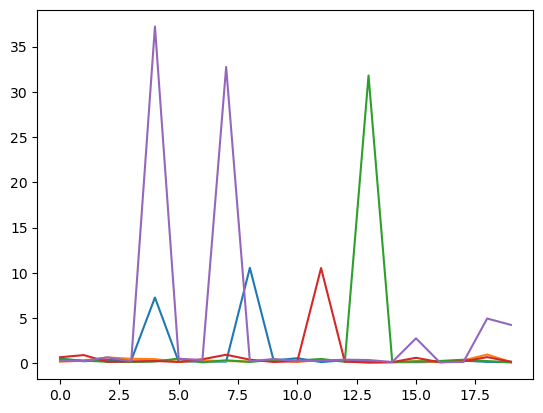

In [49]:
plt.plot(losses)